# Principal Component Analysis (PCA)

Principal Component Analysis seeks a subspace of a given dimension $K$ of the feature space such that projections of the data samples onto that subspace are as spread out as possible. If there is space between groups of data samples, this has advantages when clustering or classifying. This subspace is known as the principal subspace.

The projected data will be as much spread out as possible, if the subspace is the space spanned by the eigenvectors of $\boldsymbol{\Sigma}$ with the largest eigenvalues, where
\begin{equation}
\boldsymbol{\Sigma} = \frac{1}{N} \sum_{n=1}^N (\mathbf{v}_n - \boldsymbol{\mu}) (\mathbf{v}_n - \boldsymbol{\mu})^T.
\end{equation}
is the sample covariance and
\begin{equation}
\boldsymbol{\mu} = \frac{1}{N} \sum_{n=1}^N \mathbf{v}_n,
\end{equation}
is the sample mean.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.decomposition import PCA
import skimage.util

In [2]:
# Load data.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

[]

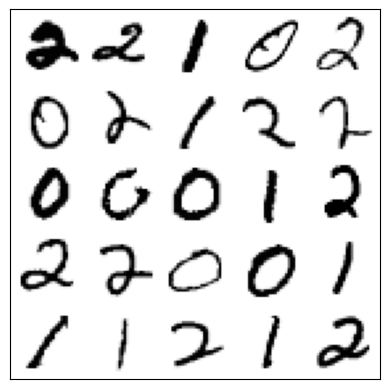

In [3]:
# Restrict data to a subset of digits and show examples.
k = 2 # Digits <= k.
data = x_train[y_train <=k]/255.0
data_label = y_train[y_train <=k]
choice = np.random.choice(np.arange(data.shape[0]),25)
montage = skimage.util.montage(data[choice])
ax = plt.imshow(montage, cmap = 'Greys')
ax.figure.get_axes()[0].set_xticks([])
ax.figure.get_axes()[0].set_yticks([])

In [4]:
# Reshape images into arrays.
#train = np.reshape(data_centered,(data_centered.shape[0],
#                    data_centered.shape[1]*data_centered.shape[2]))
train = np.reshape(data,(data.shape[0],
                    data.shape[1]*data.shape[2]))

In [5]:
# Initialize Principal Component Analysis
ncomp = 3
pca = PCA(n_components = ncomp)

In [6]:
# Find the principal components and transform data points to this
# subspace.
X = pca.fit_transform(train)

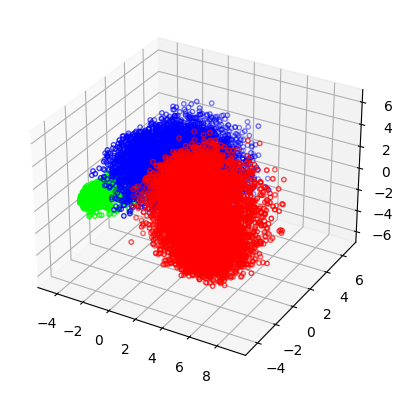

In [7]:
# Display data points.
colours =  [(1,0,0), (0,1,0), (0,0,1), (1,1,0), (0,1,1), (1,0,1), (0,0,0)]
fig = plt.figure()
if ncomp == 2:
  for i in range(0,k+1):
    plt.scatter(X[data_label == i,0], X[data_label == i,1],
                facecolors = 'none', edgecolors = colours[i],
                s = 10)
else:
  ax = plt.axes(projection='3d')
  for i in range(0,k+1):
    ax.scatter(X[data_label == i,0], X[data_label == i,1],
                X[data_label == i,2],
                facecolors = 'none', edgecolors = colours[i],
                s = 10)
plt.show()

[]

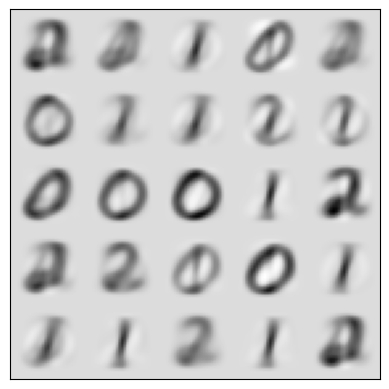

In [8]:
# Reconstruct examples.
rec = pca.inverse_transform(X[choice,:])
# Reshape to images of digits.
rec_digits = np.reshape(rec,(rec.shape[0],
              data.shape[1], data.shape[2]))
montage = skimage.util.montage(rec_digits)
ax = plt.imshow(montage, cmap = 'Greys')
ax.figure.get_axes()[0].set_xticks([])
ax.figure.get_axes()[0].set_yticks([])